<a href="https://colab.research.google.com/github/Samplovodsk/intensive_3/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Модель PROPHET**

**train**

In [26]:
import pandas as pd
from prophet import Prophet
import joblib

# Загрузка данных
train_df = pd.read_excel("train.xlsx", parse_dates=['dt'])

# Переименуем колонки для Prophet
train_df = train_df.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})

# Обучение модели Prophet
model = Prophet()
model.fit(train_df)

# Сохранение модели
joblib.dump(model, 'model.pkl')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmtyntsaw/z4twa3oj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmtyntsaw/rmdyipz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17290', 'data', 'file=/tmp/tmpmtyntsaw/z4twa3oj.json', 'init=/tmp/tmpmtyntsaw/rmdyipz6.json', 'output', 'file=/tmp/tmpmtyntsaw/prophet_modeleh6z5105/prophet_model-20250319135839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:58:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


['model.pkl']

**main**

In [27]:
import pandas as pd
import joblib
from prophet import Prophet

model = joblib.load('model.pkl')

test_df = pd.read_excel("test.xlsx", parse_dates=['dt'])

test_df = test_df.rename(columns={'dt': 'ds'})

# Прогнозирование на 6 недель вперед
future = model.make_future_dataframe(periods=6, freq='W')
forecast = model.predict(future)

def calculate_optimal_n(prices):
    max_saving = -float('inf')
    best_n = 1
    current_price = prices.iloc[0]
    for n in range(1, 7):
        future_prices = prices.iloc[1:n+1]
        saving = current_price * n - future_prices.sum()
        if saving > max_saving:
            max_saving = saving
            best_n = n
    return best_n

# Применение функции к прогнозам
test_df['N'] = [calculate_optimal_n(forecast['yhat'].iloc[i:i+7]) for i in range(len(test_df))]

# Сохранение результатов
test_df.to_excel("test.xlsx", index=False)

In [28]:
import pandas as pd

train_df = pd.read_excel("train.xlsx", parse_dates=['dt'])
train_df = train_df.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})

train_df.head()

,ds,y
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300


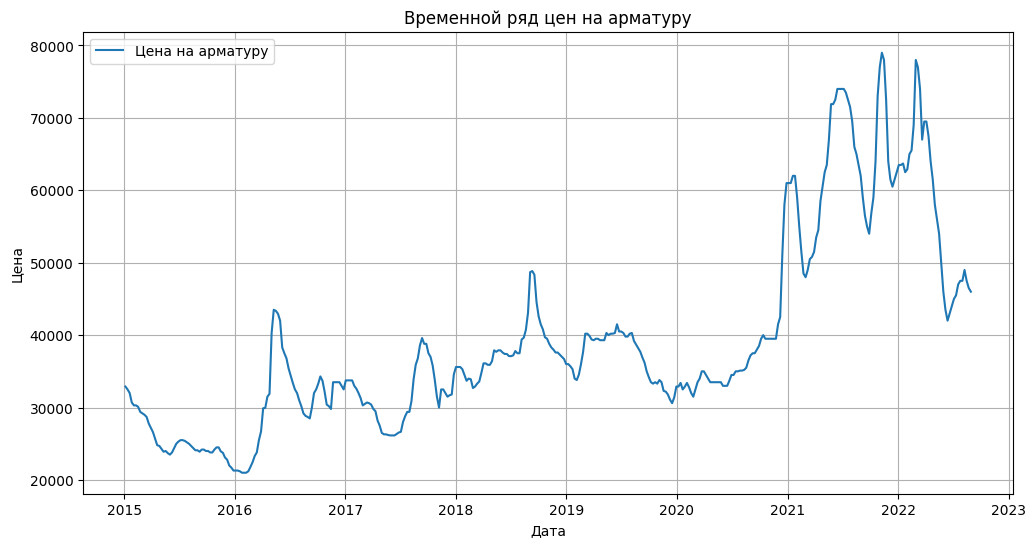

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Цена на арматуру')
plt.title('Временной ряд цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()

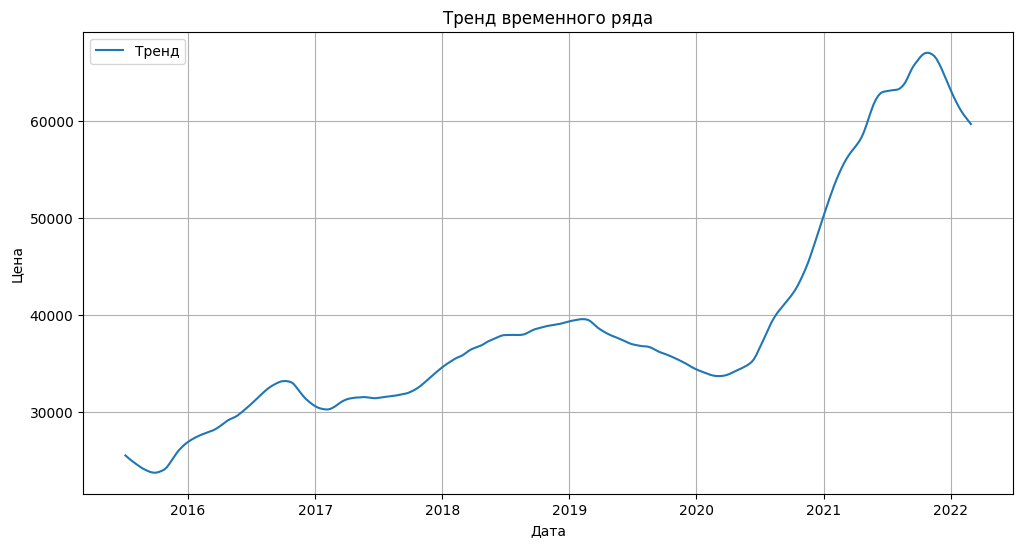

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция
decomposition = seasonal_decompose(train_df.set_index('ds')['y'], model='additive', period=52)  # period=52 для годовой сезонности

plt.figure(figsize=(12, 6))
plt.plot(decomposition.trend, label='Тренд')
plt.title('Тренд временного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()

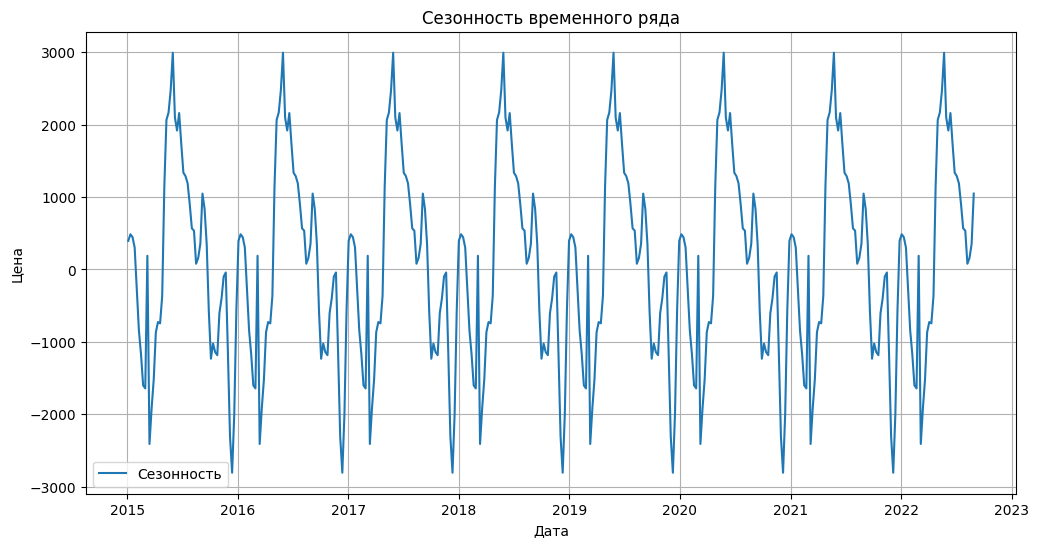

In [31]:
# график сезонности
plt.figure(figsize=(12, 6))
plt.plot(decomposition.seasonal, label='Сезонность')
plt.title('Сезонность временного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()


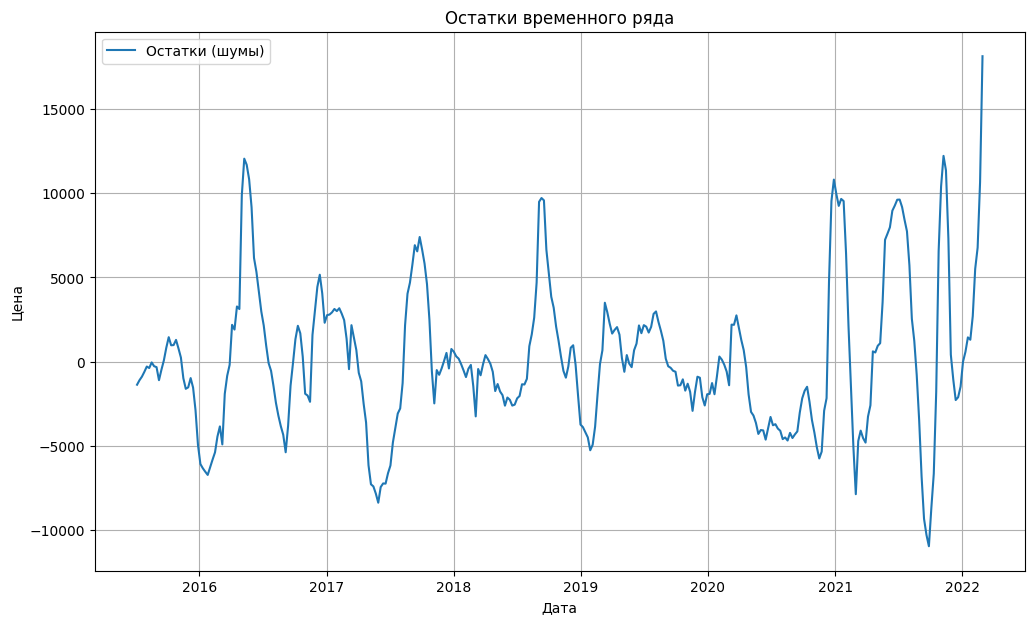

In [32]:
# график шумов
plt.figure(figsize=(12, 7))
plt.plot(decomposition.resid, label='Остатки (шумы)')
plt.title('Остатки временного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()